In [1]:
!pip3 install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

 # Importing Data Set


In [3]:
data=pd.read_csv("C:\\Users\\SANTHOSH\\OneDrive\\Desktop\\Project\\House Price Prediction Data California.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [6]:
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
data.shape

(20640, 10)

In [9]:
data.dropna(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [11]:
data.corr()

C:\Users\SANTHOSH\AppData\Local\Temp\ipykernel_10740\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


# Exploratory Data Analysis

In [12]:
!pip install matplotlip

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"],axis = 1)
Y = data["median_house_value"]

In [14]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [15]:
Y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
train_data= X_train.join(Y_train)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15782,-122.40,37.78,32,352,132.0,313,105,2.5742,NEAR BAY,350000
9924,-122.32,38.32,26,2710,498.0,1439,484,5.0000,NEAR BAY,175200
10986,-117.83,33.75,34,2660,601.0,1475,567,3.4152,<1H OCEAN,210200
7252,-118.12,33.99,24,1705,479.0,2037,459,2.4219,<1H OCEAN,137500
20093,-120.12,38.12,37,3355,666.0,338,136,2.0625,INLAND,88900
...,...,...,...,...,...,...,...,...,...,...
4656,-118.33,34.05,45,1707,519.0,1446,466,2.1736,<1H OCEAN,171300
2518,-122.13,39.74,20,1401,280.0,668,250,2.2569,INLAND,94300
11371,-117.98,33.71,26,1905,373.0,1098,368,4.8611,<1H OCEAN,229600
3896,-118.50,34.21,35,1668,332.0,807,311,4.5125,<1H OCEAN,200300


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

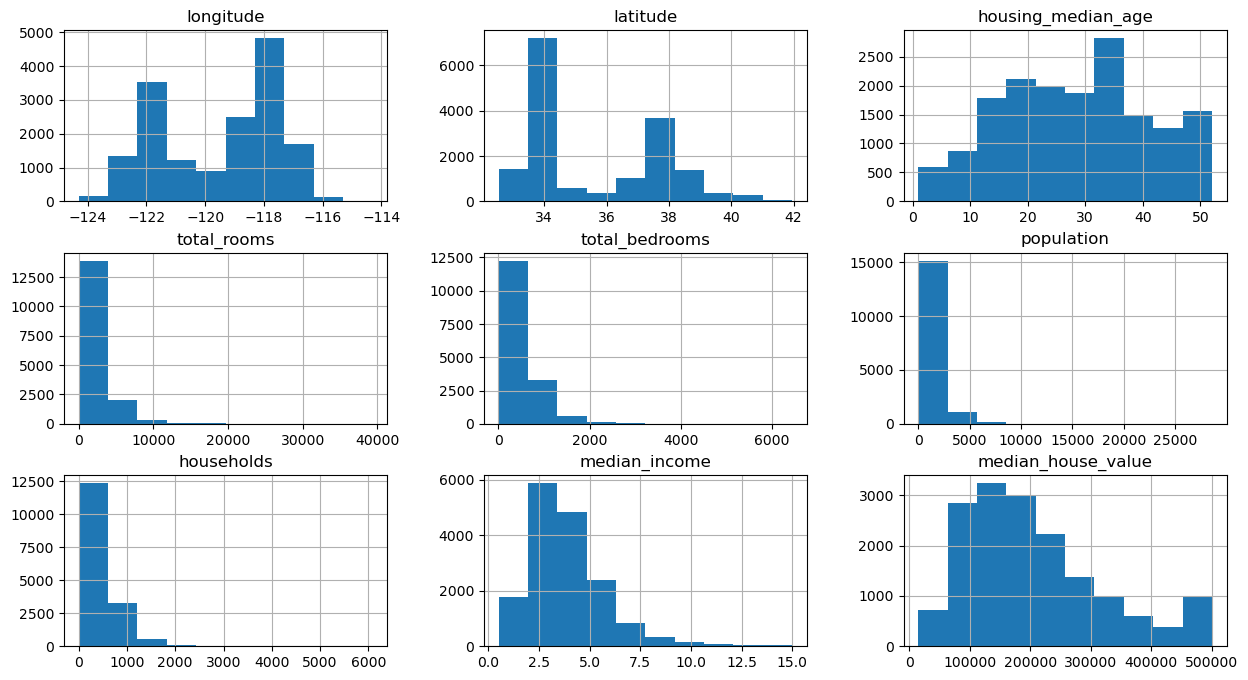

In [19]:
train_data.hist(figsize=(15,8))

In [20]:
train_data.corr()

C:\Users\SANTHOSH\AppData\Local\Temp\ipykernel_10740\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924693,-0.105680,0.043134,0.067402,0.097788,0.054210,-0.014779,-0.040569
latitude,-0.924693,1.000000,0.008875,-0.037165,-0.068001,-0.108866,-0.072895,-0.081277,-0.149129
housing_median_age,-0.105680,0.008875,1.000000,-0.360245,-0.321282,-0.302083,-0.303744,-0.115576,0.102421
total_rooms,0.043134,-0.037165,-0.360245,1.000000,0.930316,0.866024,0.919581,0.199061,0.136810
total_bedrooms,0.067402,-0.068001,-0.321282,0.930316,1.000000,0.885441,0.980411,-0.005594,0.053994
population,0.097788,-0.108866,-0.302083,0.866024,0.885441,1.000000,0.914021,0.007737,-0.023106
households,0.054210,-0.072895,-0.303744,0.919581,0.980411,0.914021,1.000000,0.015441,0.069171
median_income,-0.014779,-0.081277,-0.115576,0.199061,-0.005594,0.007737,0.015441,1.000000,0.687610
median_house_value,-0.040569,-0.149129,0.102421,0.136810,0.053994,-0.023106,0.069171,0.687610,1.000000


In [21]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +  1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1) 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

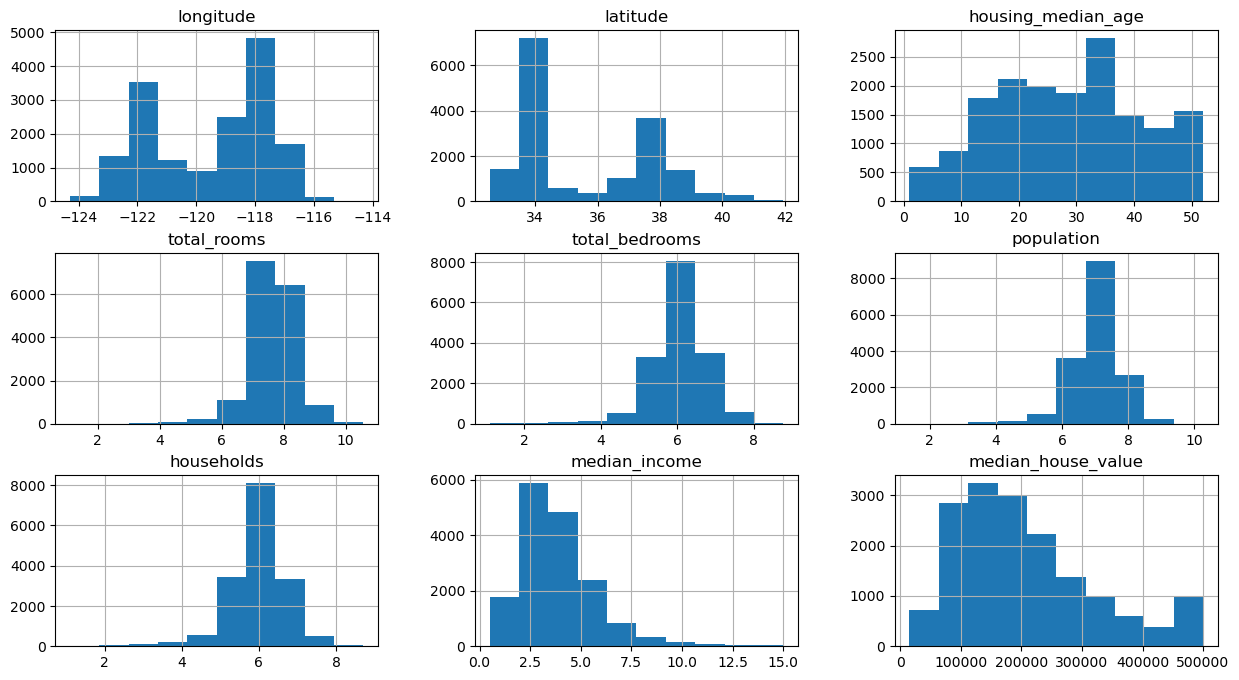

In [22]:
train_data.hist(figsize=(15,8))

In [23]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7262
INLAND        5191
NEAR OCEAN    2112
NEAR BAY      1777
ISLAND           4
Name: ocean_proximity, dtype: int64

In [24]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) 

<Axes: >

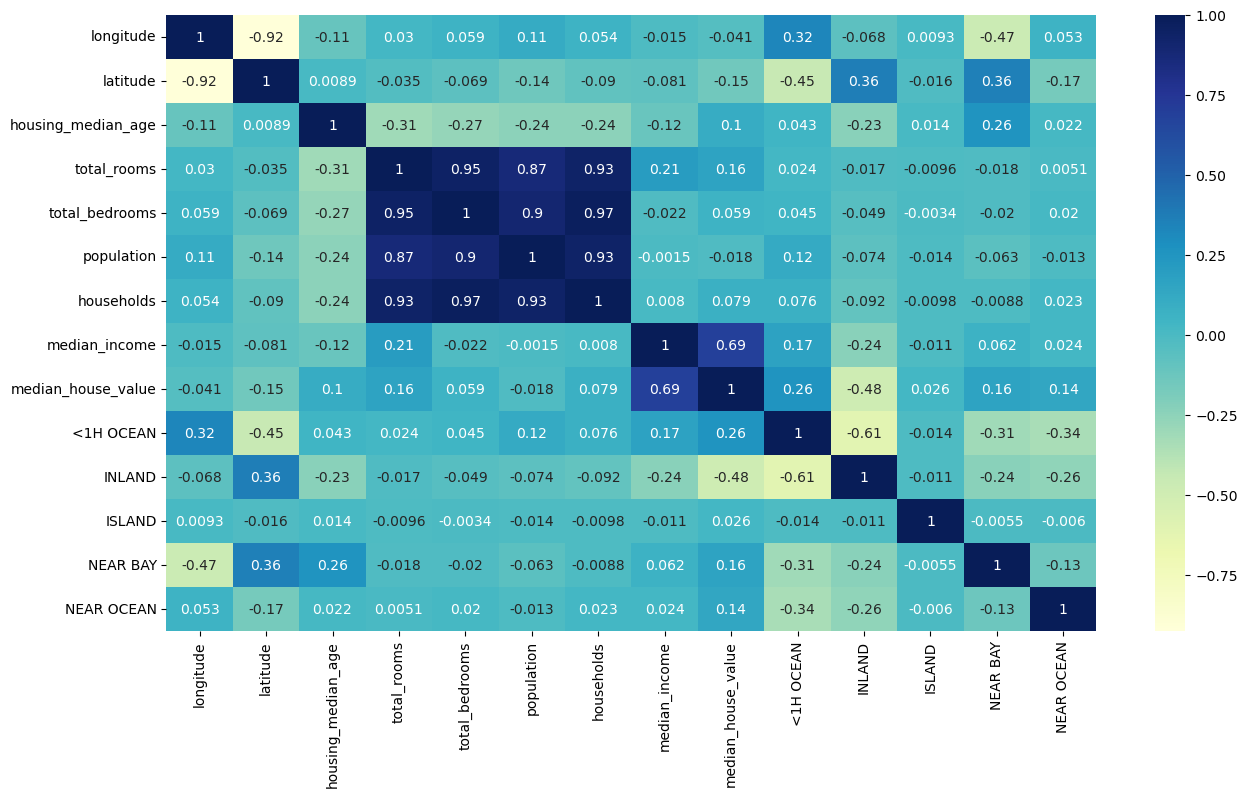

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

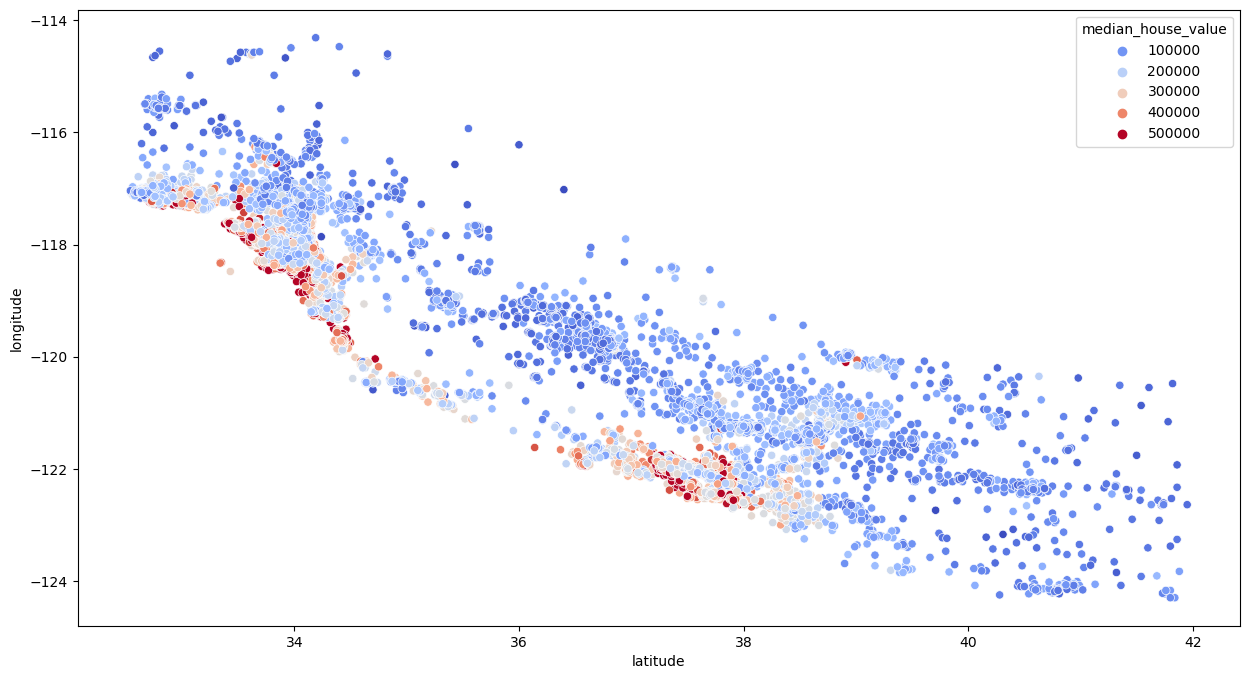

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y='longitude',data=train_data, hue='median_house_value', palette="coolwarm")

In [27]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data["household_rooms"] = train_data['total_rooms']/train_data['households'] 

In [28]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
longitude,1.000000,-0.924693,-0.105680,0.029869,0.059142,0.105881,0.054170,-0.014779,-0.040569,0.323948,-0.067811,0.009323,-0.473400,0.053115,0.092566,-0.062012
latitude,-0.924693,1.000000,0.008875,-0.034984,-0.069303,-0.135355,-0.089621,-0.081277,-0.149129,-0.448567,0.362275,-0.016492,0.355828,-0.167748,-0.111057,0.138541
housing_median_age,-0.105680,0.008875,1.000000,-0.311532,-0.271952,-0.244084,-0.241360,-0.115576,0.102421,0.043220,-0.233806,0.014180,0.255807,0.022420,-0.038562,-0.035589
total_rooms,0.029869,-0.034984,-0.311532,1.000000,0.946695,0.866233,0.932557,0.207578,0.163814,0.023861,-0.016576,-0.009606,-0.018307,0.005096,0.414619,-0.370393
total_bedrooms,0.059142,-0.069303,-0.271952,0.946695,1.000000,0.897966,0.974693,-0.021913,0.059432,0.045100,-0.048965,-0.003381,-0.019900,0.019773,0.676436,-0.542780
population,0.105881,-0.135355,-0.244084,0.866233,0.897966,1.000000,0.932395,-0.001461,-0.018124,0.117739,-0.073730,-0.013768,-0.062812,-0.013153,0.575251,-0.616569
households,0.054170,-0.089621,-0.241360,0.932557,0.974693,0.932395,1.000000,0.007988,0.078871,0.075895,-0.091644,-0.009783,-0.008823,0.023407,0.637452,-0.648978
median_income,-0.014779,-0.081277,-0.115576,0.207578,-0.021913,-0.001461,0.007988,1.000000,0.687610,0.168919,-0.238729,-0.010623,0.061794,0.024249,-0.507536,0.322991
median_house_value,-0.040569,-0.149129,0.102421,0.163814,0.059432,-0.018124,0.078871,0.687610,1.000000,0.256499,-0.483844,0.026129,0.162697,0.139350,-0.193199,0.107472
<1H OCEAN,0.323948,-0.448567,0.043220,0.023861,0.045100,0.117739,0.075895,0.168919,0.256499,1.000000,-0.609930,-0.013988,-0.312261,-0.344408,0.077540,-0.130553


# Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg= LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [30]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1) 

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)  

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data["household_rooms"] = test_data['total_rooms']/test_data['households'] 


In [31]:
X_test, Y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [32]:
X_test_s = scaler.transform(X_test)

In [33]:
reg.score(X_test_s, Y_test)

C:\Users\SANTHOSH\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-446.032912066224

# Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test,Y_test)

0.8152389359709922